In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:
from sklearn.ensemble import RandomForestRegressor
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class RFRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="MLP"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml= RandomForestRegressor
        self.params = {
            'n_estimators': 100,
            'max_depth': None,
            'min_samples_split': 2,
            'min_samples_leaf': 1,            
            'bootstrap': True
        }
        
        self.params_space = {
            'n_estimators': Integer(100, 1000),
            'max_depth': Integer(3, 100),
            'min_samples_split': Integer(2, 20),
            'min_samples_leaf': Integer(1, 10),
            'max_features': Categorical([ 'sqrt', 'log2']),
            'bootstrap': [True, False] 
        }


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

#save_path=f'{path}Random_Forest/'
file_name = '/Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

rf_model = RFRegressor()
rf_model.set_data(X,y)

In [ ]:
opt_rf, best_params_rf = rf_model.SearchBestModel(X, y, n_iter_=1000, early_stop=False, save_result=True)
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/Random_Forest/Modelos/opt_RF_model_all_features.pickle', 'wb') as file:
    #pickle.dump(opt_rf, file)

In [5]:
with open(f'{path}Opt_Model/opt_RF_model_all_features.pickle', 'rb') as file:
    opt_rf= pickle.load(file)

In [9]:
resultados = opt_rf.cv_results_
rf_model.guardar_resultados_busqueda(resultados=resultados)

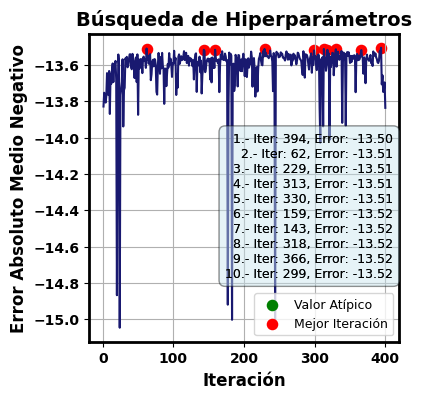

Top 1: Iteración 394, Error -13.504640202114482
Top 2: Iteración 62, Error -13.509066321156386
Top 3: Iteración 229, Error -13.511297542048604
Top 4: Iteración 313, Error -13.511404784331324
Top 5: Iteración 330, Error -13.513310892227178
Top 6: Iteración 159, Error -13.515765270129052
Top 7: Iteración 143, Error -13.515986104688764
Top 8: Iteración 318, Error -13.516377596741112
Top 9: Iteración 366, Error -13.517602508848706
Top 10: Iteración 299, Error -13.519733483187176


In [7]:
rf_model.plot_search_best_model(opt_rf, linewidth=1.5, color='midnightblue')

In [8]:
best_params_rf = rf_model.best_hyper(opt_rf)

In [9]:
best_params_rf

[{'bootstrap': False,
  'max_depth': 46,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 898},
 {'bootstrap': False,
  'max_depth': 29,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 1000},
 {'bootstrap': False,
  'max_depth': 89,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 463},
 {'bootstrap': False,
  'max_depth': 40,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 973},
 {'bootstrap': False,
  'max_depth': 57,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 648},
 {'bootstrap': False,
  'max_depth': 16,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 1000},
 {'bootstrap': False,
  'max_depth': 49,
  'max_features': 'sqrt',
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 182},
 {'b

# Trainer

In [9]:
results, best_model_results, best_model = rf_model.trainer(params_=best_params_rf[0])

In [9]:
with open(f'{path}Opt_Model/BestModel_RF_all_features.pickle', 'wb') as file:
    pickle.dump(rf_model.model, file)
with open(f'{path}Opt_Model/results_RF_model_all_features.pickle', 'wb') as file:
    pickle.dump(results, file)

In [10]:
y_pred = rf_model.predicter(rf_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.89e-31
Time:                        20:16:19   Log-Likelihood:                -987.84
No. Observations:                 276   AIC:                             1980.
Df Residuals:                     274   BIC:                             1987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9987      1.340     24.631      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


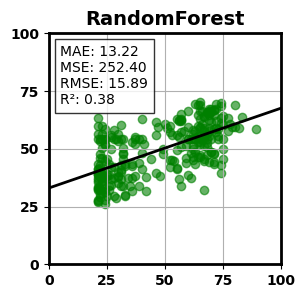

Error medio absoluto: 13.218292669649546
Error cuadrático medio: 252.40128436760747
Raíz del error cuadrático medio: 15.887142108246136
Coeficiente de determinación (R²): 0.37633621403239725


In [11]:
rf_model.plot_regresion(y=y_pred,x= rf_model.y_test, x_size=3,y_size=3, x_ticks_step=25,y_ticks_step=25,x_max_limit=100,y_max_limit=100,x_min_limit=0,y_min_limit=0,title='RandomForest',label=False,color='green', color_line_fit="black", line_ideal=False,confidence_interval=False,legend=False,alpha=0.6)

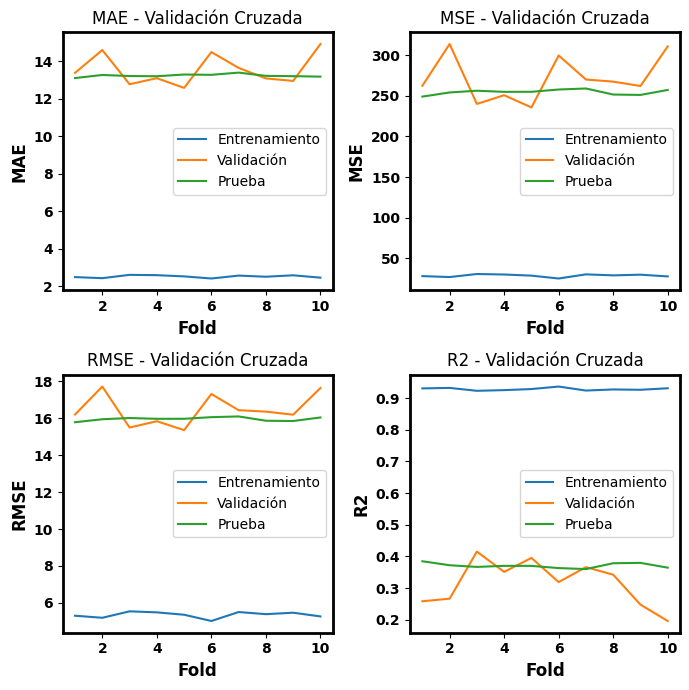

In [13]:
rf_model.plot_metricas_evaluacion(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.89e-31
Time:                        20:19:37   Log-Likelihood:                -987.84
No. Observations:                 276   AIC:                             1980.
Df Residuals:                     274   BIC:                             1987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9987      1.340     24.631      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:359: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


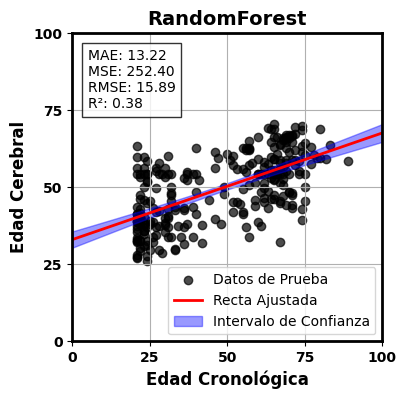

Error medio absoluto: 13.218292669649546
Error cuadrático medio: 252.40128436760747
Raíz del error cuadrático medio: 15.887142108246136
Coeficiente de determinación (R²): 0.37633621403239725


In [12]:
rf_model.plot_regresion(y=y_pred,x= rf_model.y_test,label_='Datos de Prueba' ,x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='RandomForest',line_ideal=False,confidence_interval=True,  color= 'black',alpha=0.7,xlabel='Edad Cronológica',ylabel='Edad Cerebral',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [14]:
shap_values, shap_sumary_sorted = rf_model.feature_importance_shap(X_test = rf_model.X_test, model = rf_model.model)

Importancia de características basada en suma de valores SHAP:
IAF_OCC_left: 387.65323838300463
Low_subj_spec_EPP_OCC_right: 368.71944431210795
IAF_OCC_right: 319.95733126581973
High_subj_spec_EPP_CING_right: 221.63844216015278
High_subj_spec_RPD_CING_right: 212.87329238306125
Low_subj_spec_EPP_PARIET_left: 210.47578145110592
Low_subj_spec_EPP_PARIET_right: 201.0581538166296
Low_subj_spec_RPD_CING_right: 154.11832242692367
Alpha2_canon_RPD_PARIET_left: 146.09878975876381
Low_subj_spec_EPP_OCC_left: 142.67697565628004
Low_subj_spec_RPD_HPC_left: 133.0503028776198
Alpha2_canon_EPP_PARIET_left: 131.38802664920328
Alpha2_canon_RPD_CING_right: 127.44122193286464
Alpha2_canon_EPP_HPC_left: 123.0507522371053
Low_subj_spec_RPD_OCC_left: 121.28406226892682
High_subj_spec_RPD_HPC_left: 110.7403061373818
Alpha2_canon_RPD_HPC_left: 107.54499603070045
High_subj_spec_EPP_HPC_left: 103.65210744389827
Alpha2_canon_EPP_PARIET_right: 89.06008635444712
Low_subj_spec_RPD_HPC_right: 88.7529226496869
Alpha2

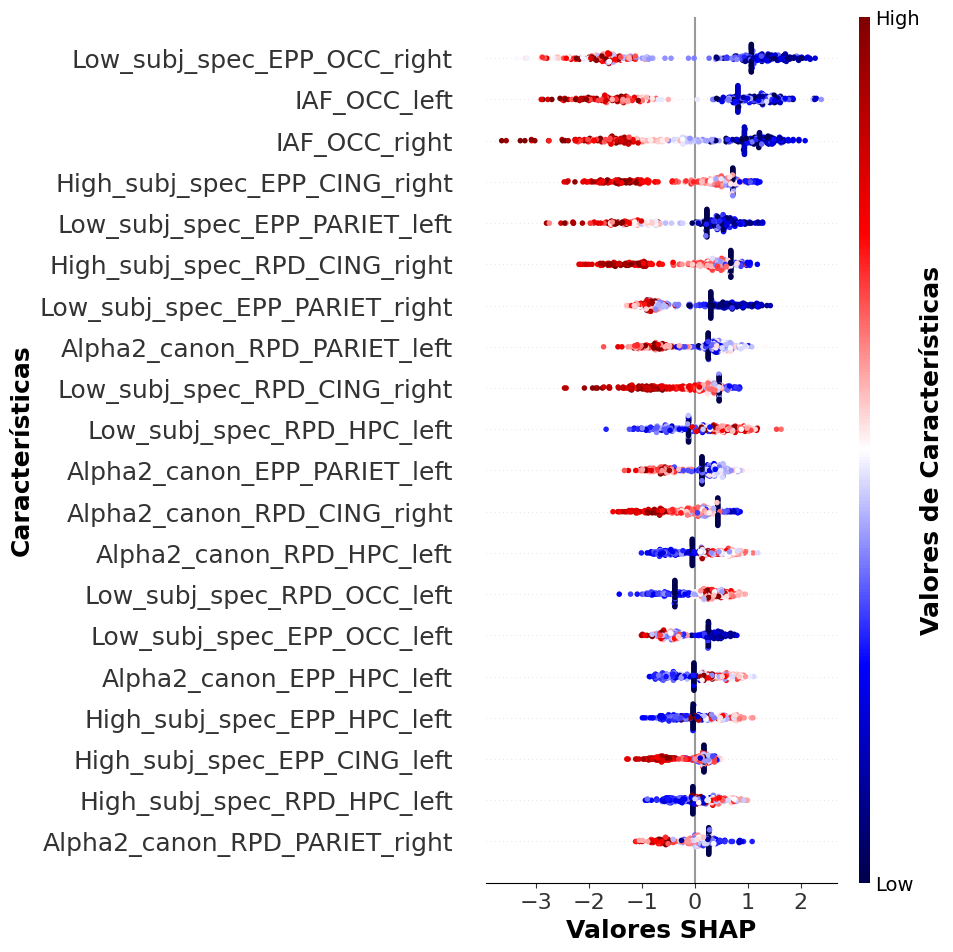

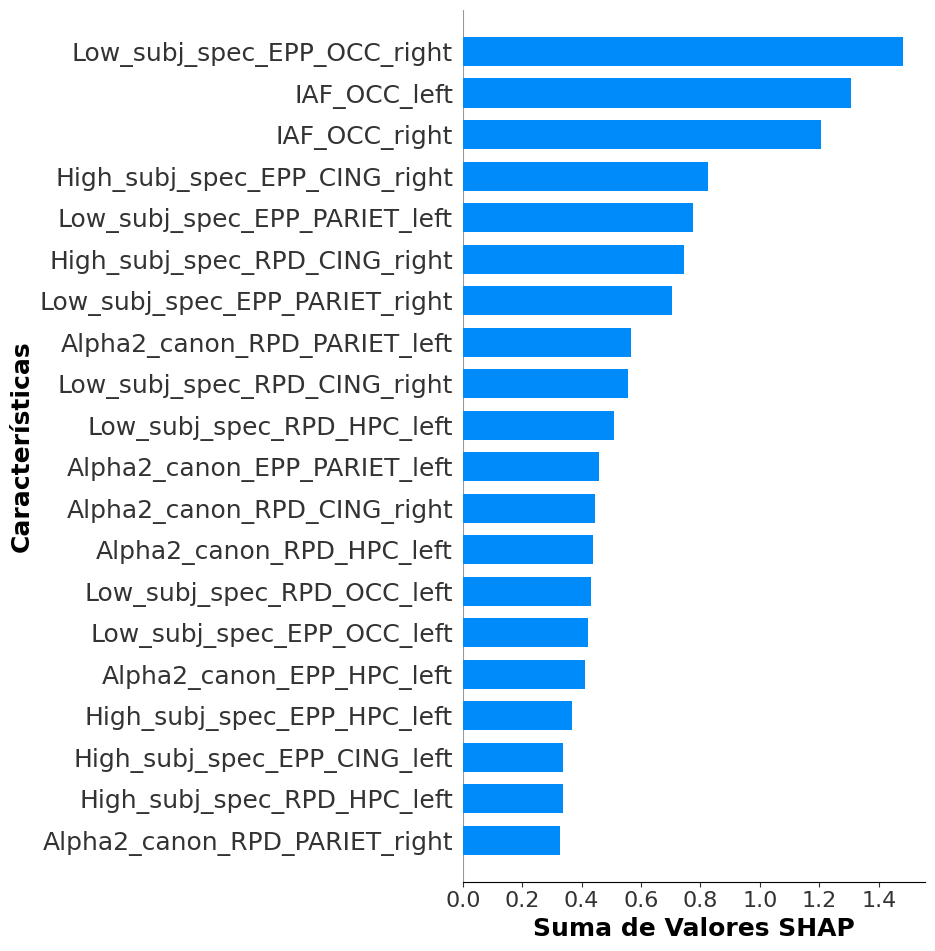

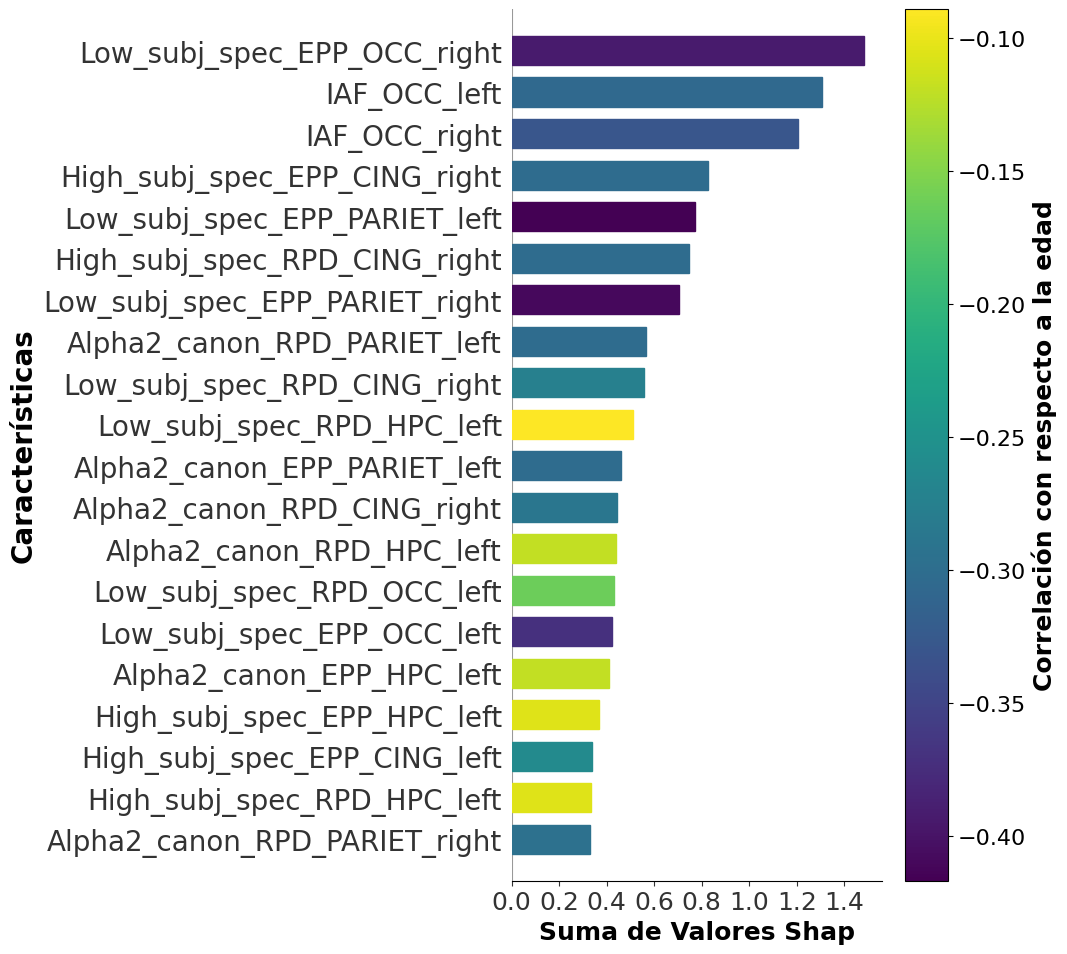

In [13]:
rf_model.plot_feature_importance(shap_values=shap_values,X_test=rf_model.X_test,y_test=rf_model.y_test, save_fig=True)

In [14]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_rf.pickle', 'wb') as file:
        pickle.dump(shap_sumary_sorted, file)

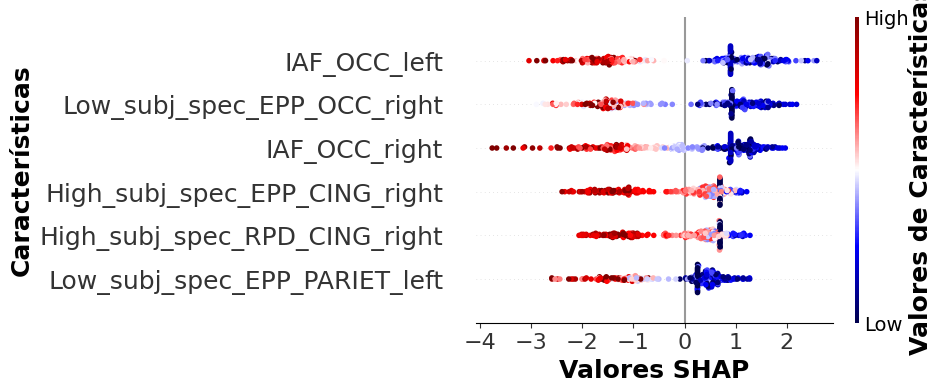

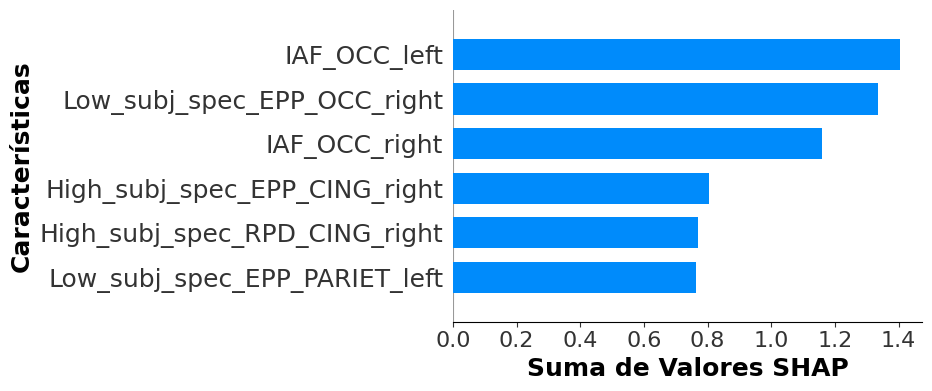

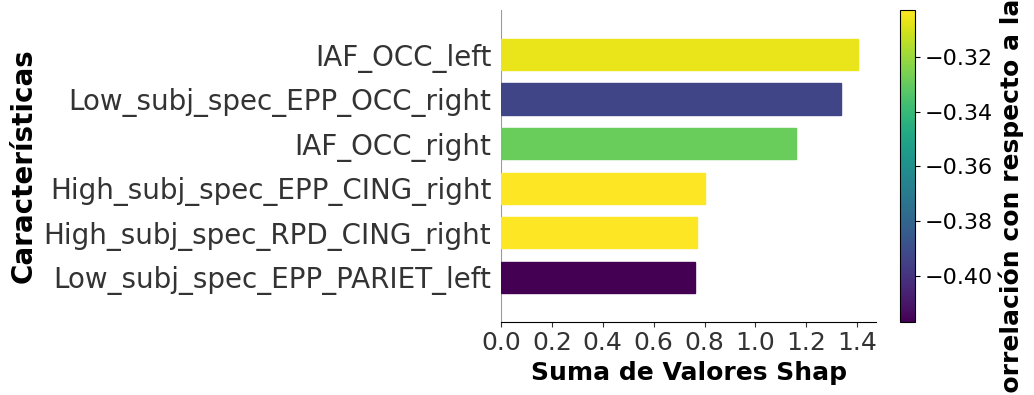

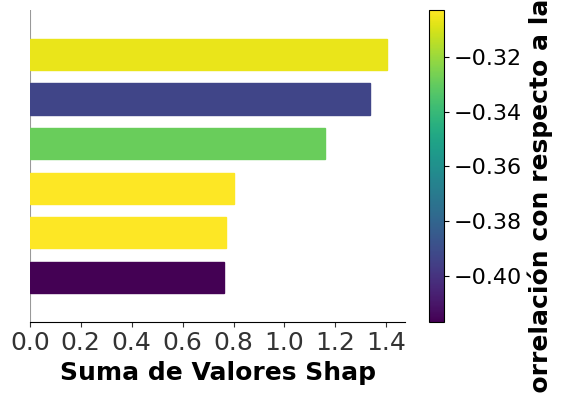

In [15]:
rf_model.plot_feature_importance(shap_values=shap_values,X_test=rf_model.X_test,y_test=rf_model.y_test, max_features=6)

# Importancia por region

In [3]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_rf.pickle', 'rb') as file:
    shap_summary_sorted_rf = pickle.load(file)


In [4]:
shap_por_region_sorted, resultado_normalizado_sorted=rf_model.shap_region(shap_summary_sorted=shap_summary_sorted_rf, num_max=20)

OCC_right: 1.000000
CING_right: 0.957061
OCC_left: 0.803334
HPC_left: 0.767400
PARIET_left: 0.669807
PARIET_right: 0.383815
CING_left: 0.125296


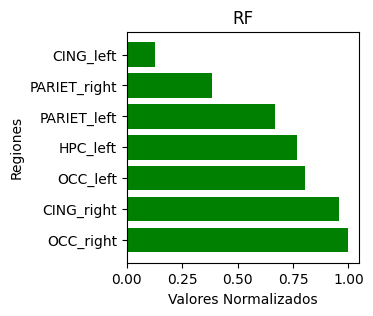

In [5]:
rf_model.plot_normalized_values(resultado_normalizado_sorted, color='green', name_set='RF',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


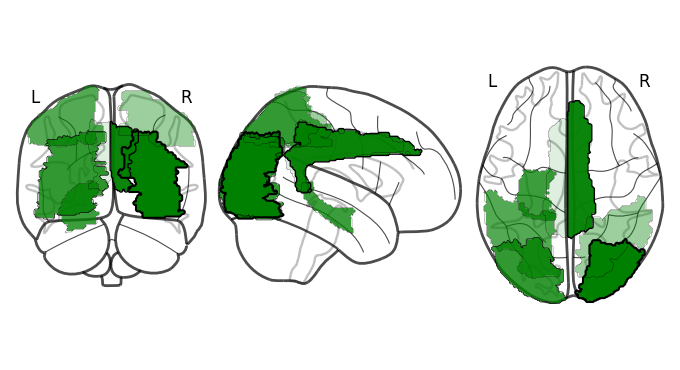

In [6]:
base_path = 'C:/Users/felipe/Documents/brain_age_/cerebritos/'

rf_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='green')